In [1]:
%%capture
!pip3 install qiskit

# Homework \#2

In [2]:
import numpy as np
import qiskit as qk
from sympy import *

In [3]:
with open('./token', 'r') as token_file:
    token = token_file.read()

In [4]:
%%capture
qk.IBMQ.save_account(token, overwrite = True)
qk.IBMQ.load_account()

In [5]:
provider = qk.IBMQ.get_provider(hub = 'ibm-q')

In [6]:
devices = provider.backends(filters=lambda x: (3 <= x.configuration().n_qubits <= 5) and not x.configuration().simulator)

In [7]:
devices

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
simd_backend = qk.Aer.get_backend('qasm_simulator')

## Task \#1

## Task \#2

### Sub-Task \#1

We need to prove identity for tensor product of Hadamar's operators:
$$\hat{H}^{\otimes n} \vert \pmb{x} \rangle = \frac{1}{\sqrt{2^n}} \sum_{\pmb z} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle$$
Or it can be written in form of operator equality using Dirac's notation:
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{\pmb z, \pmb x} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle \langle \pmb{x} \vert$$

First of all let's write Hadamar's operator for one qu-bit:
$$\hat{H} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \sum_{x_1,y_1} (-1)^{\pmb{x}_1 \pmb{z}_1} \vert \pmb{x}_1 \rangle \langle \pmb{z}_1 \vert$$
Now we can expand tensor product explicitly:
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \left\{ \sum_{x_1,y_1} (-1)^{{x}_1 {z}_1} \vert {x}_1 \rangle \langle {z}_1 \vert \right\} \otimes \left\{ \sum_{x_2,y_2} (-1)^{{x}_2 {z}_2} \vert {x}_2 \rangle \langle {z}_2 \vert \right\} \otimes \cdots \otimes \left\{ \sum_{x_n,y_n} (-1)^{{x}_n {z}_n} \vert {x}_n \rangle \langle {z}_n \vert \right\}$$
Multiplying and re-arranging bras & kets we get:
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x_1,\cdots,x_n \vert y_1,\cdots,y_n} (-1)^{x_1 y_1} \cdot (-1)^{x_n y_n} \cdot \left\{\vert {x}_1 \rangle \otimes \cdots \otimes \vert {x}_n \rangle\right\} \left\{\langle {z}_1 \vert \otimes \cdots \otimes \langle {z}_n \vert\right\}$$
That form is equal to the target one.

### Sub-Task \#3

The following identity should be proven (assuming $\pmb{s}^\perp=\{(\pmb x \oplus \pmb y) \cdot \pmb z = 0\}$):
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb x \rangle + \vert \pmb y \rangle\} = \frac{1}{\sqrt{2^{n+1}}} \sum_{\pmb z\in \pmb{s}^{\perp}} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle$$

Let's write $\vert \pmb x \rangle + \vert \pmb y \rangle = \vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle$. Thus, using previous identity:
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle\} = \frac{1}{\sqrt{2^{n+1}}} \sum_{\pmb z} \{(-1)^{\pmb{x}_0 \cdot \pmb z} + (-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z}\} \vert \pmb z \rangle$$

Since $(-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z}\} = (-1)^{\pmb{x}_0 \cdot \pmb z} \cdot (-1)^{\pmb{a} \cdot \pmb z}$ we have:
$$(-1)^{\pmb{x}_0 \cdot \pmb z} + (-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z} = 
    \left\{
    \begin{aligned}
        &0 & &\pmb a \cdot \pmb z = 1\\
        &2 (-1)^{\pmb {x}_0 \cdot \pmb z} & & \pmb a \cdot \pmb z = 0
    \end{aligned}
    \right.$$

Thus, we can write:
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle\} = \frac{1}{\sqrt{2^{n-1}}} \sum_{\pmb a \cdot \pmb z = 0} (-1)^{\pmb{x}_0 \cdot \pmb z} \vert \pmb z \rangle$$

It's exatly what we want to get but with re-defined symbols. 

## Task \#3

First of all let's construct circuit for Simon's algorithm with $n = 1,~x=1,~a=111$:

In [9]:
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

In [10]:
a = '111'
n = len(a)
simon_circuit = qk.QuantumCircuit(n * 2, n)
simon_circuit.h(range(n))  
simon_circuit.barrier()
simon_circuit += simon_oracle(a)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n), range(n))
results = qk.execute(simon_circuit, backend = simd_backend, shots = 8192).result()
counts = results.get_counts()

In [11]:
simon_circuit.draw()

┌───┐ ░                                ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■──────────────■────■────■───░─┤ H ├┤M├──────
     ├───┤ ░   │              │    │    │   ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────┼────┼────┼───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │  ┌─┴─┐  │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼──┤ X ├──┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  └───┘┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼───────┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐     └───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├──────────┤ X ├─░───────╫──╫──╫─
           ░           └───┘          └───┘ ░       ║  ║  ║ 
c: 3/═══════════════════════════════════════════════╩══╩══╩═
                                                    0  1  2

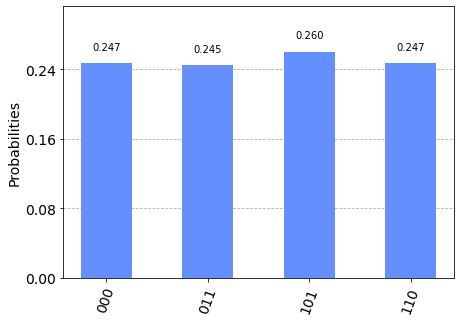

In [12]:
plot_histogram(counts)

In [13]:
from qiskit import Aer

In [14]:
aer_backend = Aer.get_backend('unitary_simulator')

In [15]:
prepare_circuit = qk.QuantumCircuit(n * 2, n)
prepare_circuit.h(range(n))  
prepare_circuit.barrier()
prepare_circuit += simon_oracle(a)
prepare_circuit.barrier()
prepare_circuit.h(range(n))
prep_results = qk.execute(prepare_circuit, backend = aer_backend).result()

In [16]:
prepare_circuit.draw()

┌───┐ ░                                ░ ┌───┐
q_0: ┤ H ├─░───■──────────────■────■────■───░─┤ H ├
     ├───┤ ░   │              │    │    │   ░ ├───┤
q_1: ┤ H ├─░───┼────■─────────┼────┼────┼───░─┤ H ├
     ├───┤ ░   │    │         │    │    │   ░ ├───┤
q_2: ┤ H ├─░───┼────┼────■────┼────┼────┼───░─┤ H ├
     └───┘ ░ ┌─┴─┐  │    │  ┌─┴─┐  │    │   ░ └───┘
q_3: ──────░─┤ X ├──┼────┼──┤ X ├──┼────┼───░──────
           ░ └───┘┌─┴─┐  │  └───┘┌─┴─┐  │   ░      
q_4: ──────░──────┤ X ├──┼───────┤ X ├──┼───░──────
           ░      └───┘┌─┴─┐     └───┘┌─┴─┐ ░      
q_5: ──────░───────────┤ X ├──────────┤ X ├─░──────
           ░           └───┘          └───┘ ░      
c: 3/══════════════════════════════════════════════

In [17]:
simon_matrix = prep_results.get_unitary(prepare_circuit, decimals = 1)
simon_matrix

array([[ 2.5000000e-01-4.59242550e-17j,  6.9388939e-17+4.59242550e-17j,
         6.9388939e-17+4.59242550e-17j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [ 6.9388939e-17+4.59242550e-17j,  2.5000000e-01-7.65404249e-17j,
         2.5000000e-01-7.65404249e-17j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [ 6.9388939e-17+4.59242550e-17j,  2.5000000e-01-7.65404249e-17j,
         2.5000000e-01-7.65404249e-17j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       ...,
       [ 0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j, ...,
         2.5000000e-01-1.07156595e-16j,  2.5000000e-01-1.07156595e-16j,
        -6.9388939e-17+4.59242550e-17j],
       [ 0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+0

In [18]:
simon_matrix.shape

(64, 64)

In [19]:
simon_matrix = np.matrix.round(simon_matrix, decimals = 5)

In [20]:
simon_matrix

array([[ 0.25-0.j,  0.  +0.j,  0.  +0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       [ 0.  +0.j,  0.25-0.j,  0.25-0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       [ 0.  +0.j,  0.25-0.j,  0.25-0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       ...,
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ...,  0.25-0.j,  0.25-0.j,
        -0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ...,  0.25-0.j,  0.25-0.j,
        -0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ..., -0.  +0.j, -0.  +0.j,
         0.25-0.j]])

In [21]:
init_state = np.zeros(64)
init_state[0] = 1.
simon_vec = simon_matrix @ init_state
simon_res = np.real(simon_vec * np.conjugate(simon_vec))

In [22]:
sum(simon_res)

1.0

In [23]:
simon_res

array([0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.0625, 0.    , 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [24]:
def to_str(snum, num_len = 64):
    snum_rep = "{0:b}".format(snum)
    return '0' * (num_len - len(snum_rep)) + snum_rep

In [25]:
def prob_num(num, res, num_mask = 8, num_len = 64):
    assert len(res.shape) == 1
    num_rep = to_str(num)
    acc = 0.
    for i, e in enumerate(res):
        i_rep = to_str(i, num_len = num_len)
        acc += 4 * (e if i_rep[::-1][:num_mask] == num_rep[::-1][:num_mask] else 0)
    return acc

In [26]:
def probs(nbit, res):
    nbit = int(nbit)
    return prob_num(1 << nbit, res)

In [27]:
res = [prob_num(i, simon_res) for i in range(8)]

In [28]:
res, sum(res)

([0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0], 1.0)

In [29]:
vecs = [np.array([0, 0, 0], dtype = 'bool'), np.array([0, 1, 1], dtype = 'bool'), np.array([1, 0, 1], dtype = 'bool'), np.array([1, 1, 0], dtype = 'bool')]

Let's iterate over all possible sets of numbers and check if system is solvable:

In [30]:
n_zero, n_ones = 0, 0
mat = np.zeros((3, 4))
for v0 in vecs:
    mat[:, 0] = v0[:]
    for v1 in vecs:
        mat[:, 1] = v1[:]
        for v2 in vecs:
            mat[:, 2] = v2[:]
            for v3 in vecs:
                mat[:, 3] = v3[:]
                smat0, smat1 = mat[:,:-1], mat[:,1:]
                d0, d1 = np.linalg.det(smat0), np.linalg.det(smat1)
                print(d0, d1)
                is_suitable = bool(d0) | bool(d1)
                if is_suitable:
                    n_ones += 1
                else:
                    n_zero += 1

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 2.0
0.0 0.0
0.0 0.0
0.0 -2.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 -2.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 2.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 2.0
0.0 0.0
0.0 0.0
0.0 -2.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 2.0
0.0 0.0
0.0 0.0
0.0 -2.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 -2.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
2.0 0.0
2.0 2.0
2.0 0.0
2.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 2.0
0.0 0.0
-2.0 0.0
-2.0 -2.0
-2.0 0.0
-2.0 0.

In [31]:
n_zero, n_ones

(214, 42)